In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#export
from exp.nb_00 import *
import operator

def test(a,b,cmp,cname=None):
    if cname is None: cname = cmp.__name__
    assert cmp(a,b), f'{cname}:\n{a}\n{b}'
    
def test_eq(a,b): test(a,b,operator.eq, '==')

In [ ]:
test_eq(TEST, 'test')
#!python run_notebook.py 01_matmul.ipynb # to run tests in console:

In [4]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
# from fastai.torch_basics import *
# from fastai.data.external import *
from fastai.vision.all import *
import pickle, gzip, math, torch, matplotlib as mpl 
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL = 'http://deeplearning.net/data/mnist/mnist.pkl'

In [5]:
path = untar_data(URLs.MNIST)

In [6]:
path.ls()

(#2) [Path('/home/sandmann/.fastai/data/mnist_png/training'),Path('/home/sandmann/.fastai/data/mnist_png/testing')]

In [8]:
(path/'training').ls()

(#10) [Path('/home/sandmann/.fastai/data/mnist_png/training/4'),Path('/home/sandmann/.fastai/data/mnist_png/training/7'),Path('/home/sandmann/.fastai/data/mnist_png/training/9'),Path('/home/sandmann/.fastai/data/mnist_png/training/5'),Path('/home/sandmann/.fastai/data/mnist_png/training/8'),Path('/home/sandmann/.fastai/data/mnist_png/training/0'),Path('/home/sandmann/.fastai/data/mnist_png/training/2'),Path('/home/sandmann/.fastai/data/mnist_png/training/1'),Path('/home/sandmann/.fastai/data/mnist_png/training/6'),Path('/home/sandmann/.fastai/data/mnist_png/training/3')]

In [9]:
files = get_image_files(path)

In [10]:
files

(#70000) [Path('/home/sandmann/.fastai/data/mnist_png/training/4/47823.png'),Path('/home/sandmann/.fastai/data/mnist_png/training/4/45709.png'),Path('/home/sandmann/.fastai/data/mnist_png/training/4/49105.png'),Path('/home/sandmann/.fastai/data/mnist_png/training/4/746.png'),Path('/home/sandmann/.fastai/data/mnist_png/training/4/13451.png'),Path('/home/sandmann/.fastai/data/mnist_png/training/4/54187.png'),Path('/home/sandmann/.fastai/data/mnist_png/training/4/30554.png'),Path('/home/sandmann/.fastai/data/mnist_png/training/4/30886.png'),Path('/home/sandmann/.fastai/data/mnist_png/training/4/52580.png'),Path('/home/sandmann/.fastai/data/mnist_png/training/4/38515.png')...]

In [14]:
mnist = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
                  get_items = get_image_files,
                  splitter = GrandparentSplitter('training', 'testing'),
                  get_y = parent_label)

In [15]:
dls = mnist.dataloaders(untar_data(URLs.MNIST))

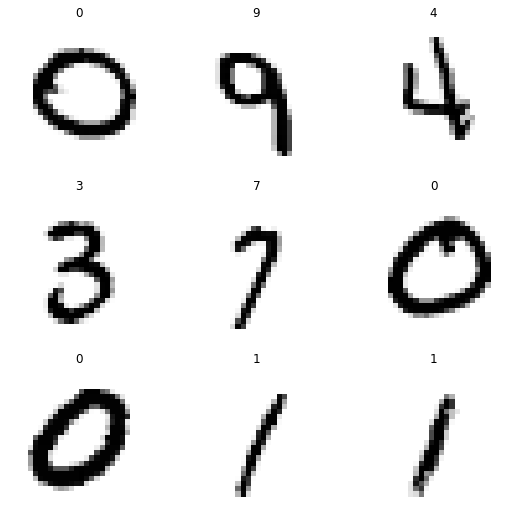

In [16]:
dls.show_batch()

In [17]:
# learn = cnn_learner(dls, resnet34, metrics=error_rate)
# learn.fine_tune(1)

In [18]:
dls.train_ds

(#60000) [(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4))...]

In [19]:
dls.valid_ds

(#10000) [(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4)),(PILImageBW mode=L size=28x28, TensorCategory(4))...]

In [20]:
type(dls.train_ds)

fastai.data.core.Datasets

In [21]:
dls.train_ds[0]

(PILImageBW mode=L size=28x28, TensorCategory(4))

In [22]:
dls.train_ds[0][0]

In [23]:
type(dls.train_ds[0][0])

fastai.vision.core.PILImageBW

In [24]:
dls.train_ds[0][1]

TensorCategory(4)

In [37]:
x_train, y_train, x_valid, y_valid = [], [], [], []

In [38]:
for elem in dls.train_ds:
    x_train.append(elem[0])
    y_train.append(elem[1])

In [39]:
for elem in dls.valid_ds:
    x_valid.append(elem[0])
    y_valid.append(elem[1])

In [40]:
def x_to_tensor(listed):
    return tensor(list(map(array, listed)), dtype=torch.float32).reshape(len(listed), -1)

In [41]:
def y_to_tensor(listed):
    return tensor(array(listed))

In [42]:
x_train = x_to_tensor(x_train)

In [43]:
x_valid = x_to_tensor(x_valid)

In [44]:
y_train = y_to_tensor(y_train)

In [45]:
y_valid = y_to_tensor(y_valid)

In [46]:
n,c = x_train.shape

In [47]:
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([60000, 784]),
 tensor([4, 4, 4,  ..., 3, 3, 3]),
 torch.Size([60000]),
 tensor(0),
 tensor(9))

In [49]:
x_valid.shape

torch.Size([10000, 784])

In [52]:
assert n == y_train.shape[0] == 60000
test_eq(c, 28*28)
test_eq(y_train.min(), 0)
test_eq(y_train.max(), 9)

In [53]:
mpl.rcParams['image.cmap'] = 'gray'

In [54]:
img = x_train[0]

In [55]:
img.view(28,28).type()

'torch.FloatTensor'

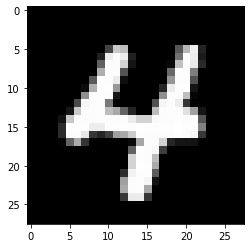

In [57]:
plt.imshow(img.view(28,28));

# Initial python model

In [58]:
weights = torch.randn(784,10)
bias = torch.zeros(10)

## Matrix multiplication

In [59]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac == br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i,k] * b[k,j]
    return c

In [60]:
m1 = x_valid[:5]
m2 = weights

In [61]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [62]:
%time t1 = matmul(m1,m2)

CPU times: user 665 ms, sys: 6 µs, total: 665 ms
Wall time: 664 ms


In [63]:
t1.shape

torch.Size([5, 10])

In [64]:
len(x_train)

60000

## Elementwise ops

In [65]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [68]:
(a < b).float().mean()

tensor(0.6667)

In [69]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [71]:
(m*m).sum().sqrt()

tensor(16.8819)

## Elementwise matmul

In [72]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac == br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [74]:
%timeit -n 10 _=matmul(m1, m2)

1.13 ms ± 111 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [75]:
665/1.13

588.4955752212389

In [76]:
#export
def near(a,b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): test(a,b,near)

In [77]:
test_near(t1, matmul(m1,m2))

## Broadcasting

In [81]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [82]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [83]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [84]:
t = c.expand_as(m)

In [85]:
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [86]:
t.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

In [88]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [89]:
c.unsqueeze(0)

tensor([[10., 20., 30.]])

In [90]:
c.unsqueeze(1)

tensor([[10.],
        [20.],
        [30.]])

In [91]:
c[None]

tensor([[10., 20., 30.]])

In [92]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

In [93]:
c[...,None]

tensor([[10.],
        [20.],
        [30.]])

In [94]:
c[None,...]

tensor([[10., 20., 30.]])

## matmul with broadcasting

In [103]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [101]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac == br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        c[i] = (a[i,:,None] * b).sum(dim=0)
    return c

In [102]:
%timeit -n 10 _ = matmul(m1,m2)

230 µs ± 37.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [104]:
test_near(t1, matmul(m1,m2))

## Einstein summation

In [107]:
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [108]:
%timeit -n 10 _ = matmul(m1,m2)

The slowest run took 6.23 times longer than the fastest. This could mean that an intermediate result is being cached.
72.1 µs ± 64.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [109]:
test_near(t1, matmul(m1,m2))

## pytorch op

In [110]:
%timeit -n 10 _ = m1.matmul(m2)

The slowest run took 10.61 times longer than the fastest. This could mean that an intermediate result is being cached.
11.8 µs ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [112]:
%timeit -n 10 _ = m1 @ m2

The slowest run took 7.41 times longer than the fastest. This could mean that an intermediate result is being cached.
9.81 µs ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [113]:
test_near(t1, m1@m2)

# Export

In [12]:
!python notebook2script.py 01_matmul.ipynb

Converted 01_matmul.ipynb to exp/nb_01.py
